# BREAST CANCER  : -

#### BACKGROUND:- Breast cancer is the most common cancer among women in the world . It account for 25% of all cancer cases, and affected over 2.1 million people in 2015 . It starts when cells in the breast begin to grow out of control . 


#### Machine Learning techniques can dramatically improve the levels of diagnosis in breast cancer. 

# PROJECT TASK : -

### MY TASK TO CLASSIFY TUMORS INTO MALIGANT(CANCER) OR BENIGN USING FEATURES OBTAINED FROM SEVERAL CELL IMAGES :

ATTRIBUTE INFORMATION :
1. ID NUMBER 
2. DIAGNOSIS (M = MALIGNANT, B= BENIGN)

TEN REAL-VALUED FEATURES ARE COMPUTED FOR EACH CELL NUCLEAS :
1. RADIUS (MEAN OF DISTANCE FROM CENTRE TO POINTS ON THE PERIMETRE)
2. TEXTURE (STANDARD DEVIATION OF GRAY SCALE VALUES )
3. PERIMETRE
4. AREA
5. SMOOTHNESS ( LOCAL VARIATION IN RADIUS LENGTHS)
6. COMPACTNESS ( PERIMETRE^2/AREA - 1.0)
7. CONCAVITY ( SEVERITY OF CONCAVE PRTIONS OF THE CONTOUR)
8. CONCAVE POINTS ( NUMBER OF CONCAVE PORTION OF THE CONTOUR.)
9. SYMMETRY
10. FRACTAL DIMESIONAL ('cOASTLINE APPROXIMATION'-1)


## 1.  IMPORT DATASET  FROM KAGGLE :-

DATASET CAN ALSO BE FOUND IN SKLEARN LIBRARY BUT I WANT TO DO PREPROCESSING AND LABELING AGAIN AND PRACTICE WILL ALSO BE DONE...

In [1]:
import pandas as pd                                # IMPORT PANDAS LIBRARY

In [2]:
data = pd.read_csv('Cancer.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.shape

(569, 33)

# 2. I WILL SELECT FEATURES AND TARGET COLUMNS  :-

In [4]:
df = data.iloc[:,2:32]                      # FEATURES   ( INPUT DATA)

In [5]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
y = data.iloc[:,1].values                # TARGET ( OUTPUT DATA )

In [7]:
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

# I will change the target column to numeric :-

In [8]:
from sklearn.preprocessing import LabelEncoder            # LabelEncoder can be used to normalize labels

In [9]:
lb = LabelEncoder()                           
y = lb.fit_transform(y)                                   # We could also use the Pandas map() function.

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [11]:
df['Target']= y                             #TARGET COLUMN MERGE IN DATAFRAME

In [12]:
df                       

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# LET'S EXPLORE OUR DATASET

In [13]:
df.shape

(569, 31)

AS WE CAN SEE,WE HAVE 569 ROWS (INSTANCE) AND 31 COLUMNS(FEATURES)

In [14]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Target'],
      dtype='object')

ABOVE IS THE NAME OF EACH COLUMNS IN OUR DATAFRAME

# THE NEXT STEP IS TO VISUALIZE OUR DATA :-

LET'S PLOT OUT JUST THE FIRST   5 VARIABLES (FEATURES)

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt               # IMPORT LIBRARY 

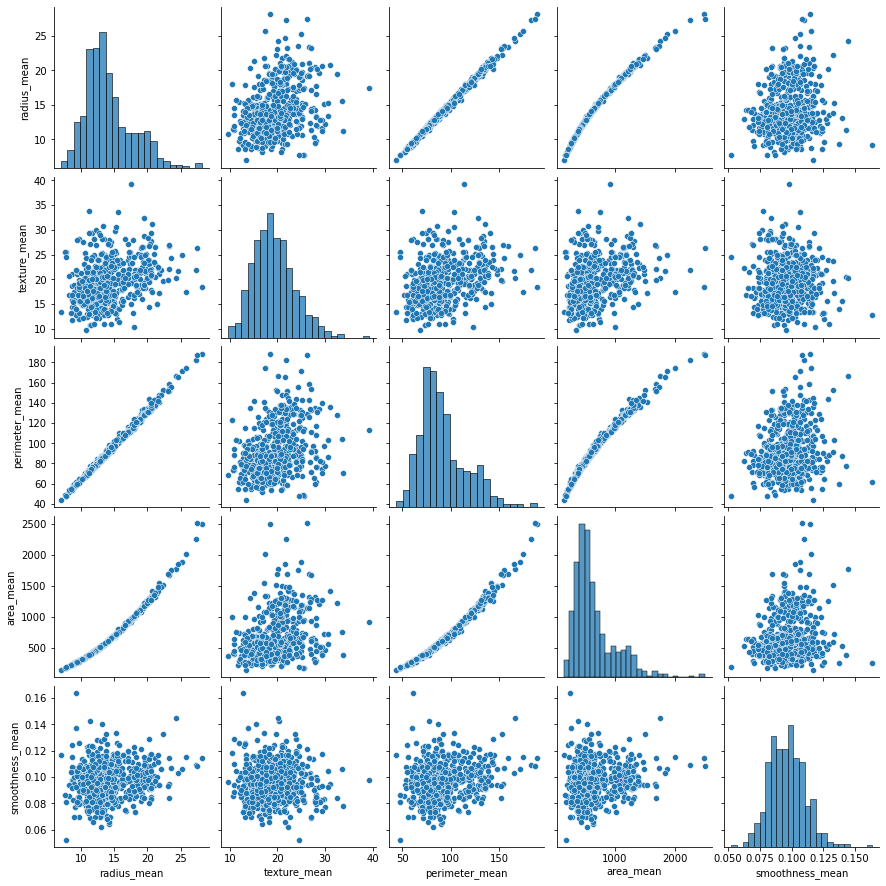

In [16]:
sb.pairplot(df,
            vars=['radius_mean','texture_mean',
                     'perimeter_mean','area_mean',
                     'smoothness_mean'])
plt.show()

THE ABOVE PLOTS SHOW THE RELATIONSHIP BETWEEN OUR FEATURES.
BUT THE PROBLEM IS THAT THEY NOT SHOW US WHICH OF THE 'DOTS' IS MALIGNANT AND BENIGN.


THIS ISSUE WILL BE ADDRESSED BELOW BY USING 'TARGET' VARIABLE AS THE "HUE" FOR THE PLOTS

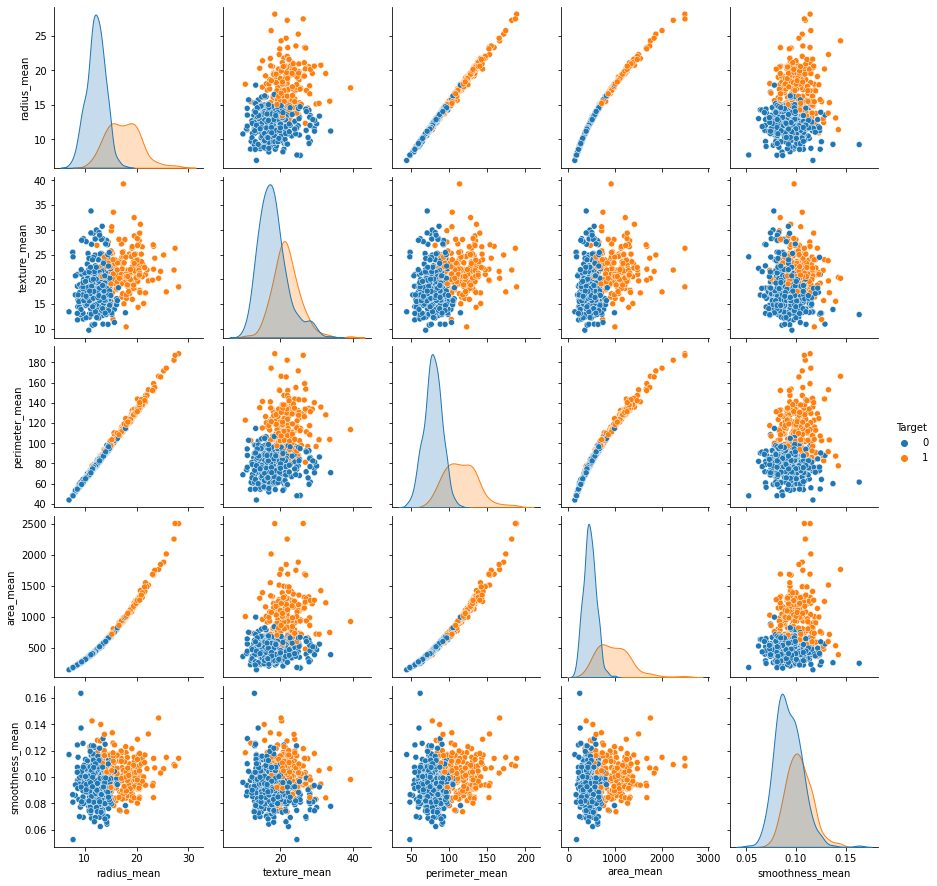

In [17]:
sb.pairplot(df,hue='Target',
            vars=['radius_mean','texture_mean',
                     'perimeter_mean','area_mean',
                     'smoothness_mean'])                                       
plt.show()

NOTE : -   
(1)(ORANGE) = BENIGN (NO CANCER)

(0)(BLUE) =   MAIGNANT (CANCER)

# HOW MANY BENIGN AND MALIGNANT DO WE HAVE IN OUR DATASETS ?

In [18]:
df['Target'].value_counts()

0    357
1    212
Name: Target, dtype: int64

As we can see, we have 212(Malignant), and 357(Benign)

Lets visualize our counts.

C:\Users\Raman\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


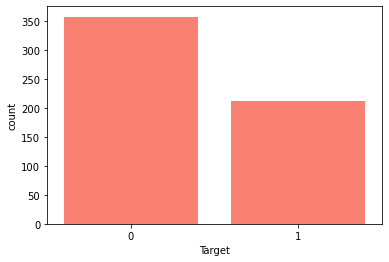

In [19]:
sb.countplot(df['Target'],label= "count",color="salmon",
            saturation=2.0,)
plt.show()

# LETS CHECK THE CORRELATION BETWEEN OUR FEATURES : -

In [ ]:
plt.figure(figsize=(20,12))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
mean_features = list(df.columns[0:10])                   #divide common features in 3 part
se_features = list(df.columns[10:20])
worst_features = list(df.columns[20:30])
print("MEAN FEATURES = ",mean_features)
print("se FEATURES= ",se_features)
print("WORST FEATURES = ",worst_features)

In [ ]:
#MEAN FEATURES CORRELATION
mean_corr= df[mean_features].corr()
mean_corr

In [ ]:
# SE FEATURES CORRELATION 
se_corr = df[se_features].corr()
se_corr

In [ ]:
# WORST FEATURES CORRELATION
worst_corr  = df[worst_features].corr()
worst_corr

# CREATE THE TRAINING AND TESTING DATA 

> TRAINING DATA =  IS THE SUBSET OF OUR DATA USED TO TRAIN OUR MODEL.

> TESTING DATA  =  IS THE SEBSET OF OUR DATA THAT THE MODEL HASN'T SEEN BEFORE . THIS IS USED TO TEST THE PERFORMANCE OF OUR MODEL.

In [ ]:
x = df.drop('Target',axis=1)                  # INPUT DATA

In [ ]:
x

In [ ]:
y                                   # OUTPUT DATA

# LETS  SPLIT OUR DATA USING 80% FOR TRAINING AND 20% FOR TESTING.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=20)

Lets check the size of training and testing data..

In [ ]:
print('The size of our training "x" (input features) is ', x_train.shape)
print('The size of our testing "x" (input features) is ', x_test.shape)
print('The size of our training "x" (output features) is ', y_train.shape)
print('The size of our testing "x" (output features) is ', y_test.shape)

# IMPORT SUPPORT VECTOR MACHINE ( SVM) MODEL.

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()
model

Now let's  Train our SVm model with our Traing dataset


In [ ]:
model.fit(x_train,y_train)

## Let use our trained model to make prediction using our testing data...

In [ ]:
y_pred = model.predict(x_test)
y_pred

Next step is to check the accuracy of our prediction by comparing it to output 
we already have (y_test). We are going to use confusion matrix for this comparison.

# CONFUSION MATRIX

The confusion matrix is a table representing to performance of your model to classify labels correctly.

A CONFUSION MATRIX FOR A BINARY CLASSIFICATION TASKS :


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
cm = np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['IS CANCER','IS HEALTHY'],
                        columns=['PREDICTED CANCER','PREDICTED HEALTHY'])
confusion

In [ ]:
sb.heatmap(confusion,annot=True)
plt.show()

# CHECK ACCURACY ...

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
np.where(y_pred!=y_test)

# IMPROVE MODEL USING FEATURES SCALING

Feature Scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x_train_scaled = sc.fit_transform(x_train)
x_train_scaled                                              

In [ ]:
x_test_scaled = sc.fit_transform(x_test)
x_test_scaled

In [ ]:
new_model = SVC()
new_model.fit(x_train_scaled,y_train)
                                                      #New model 

In [ ]:
pred = new_model.predict(x_test_scaled)
pred

In [ ]:
con = confusion_matrix(y_test,pred)
sb.heatmap(con,annot=True,fmt='d')
plt.title("  >       AWESOME PERFORMANCE !  WE ONLY HAVE 3 FALSE PREDICTION ")
plt.show()

In [ ]:
accuracy_score(y_test,pred)

# Precison  &  Recall :-

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
precision_score(y_test,pred)                          

In [ ]:
recall_score(y_test,pred)

# F1 Score :

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,pred)

# FURTHER MODEL IMPROVEMENT 

The search for the optimal sets of hyperparametres is called gridsearching ...

In [ ]:
param_grid = {'C': [0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly']}
param_grid

# GRIDSEARCH MODEL : - 

In [ ]:
from sklearn.model_selection import GridSearchCV             # CV ( cross validation )

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(x_train_scaled,y_train)

Lets print out the "grid" with the  best parametre :

In [ ]:
print (grid.best_params_)
print('\n')
print(grid.best_estimator_)

As we can see , the best parameters are 'C': 10, 'gamma': 0.01, 'kernel': 'rbf'

In [ ]:
grid_prediction = grid.predict(x_test_scaled)

In [ ]:
cm = confusion_matrix(y_test,grid_prediction)
sb.heatmap(cm,annot=True,)
plt.show()

In [ ]:
accuracy_score(y_test,grid_prediction)

In [ ]:
np.where(y_test!=grid_prediction)